In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

In [2]:
os.chdir(r'C:\Users\hp\Videos\Step1-fixedDistance_avg,std\Folders\2016-11-22-14-09-37-Joao_onlythermalthermal_image-txt')

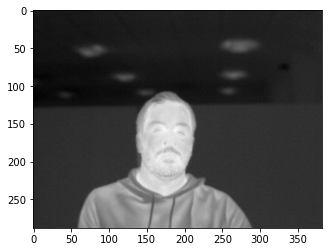

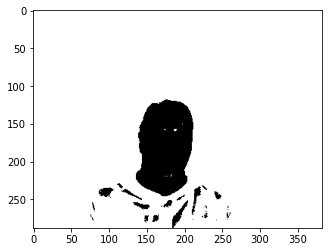

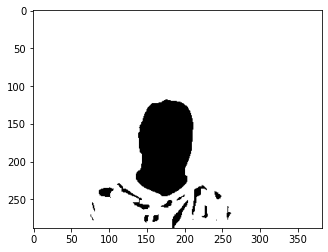

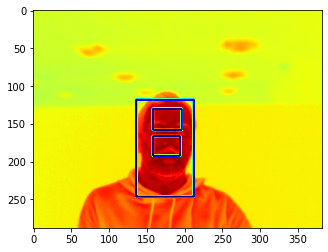

In [3]:
count = 0
forehead_vals = np.array([])
nose_vals = np.array([])
forehead_avg = np.array([])
nose_avg = np.array([])

for idx,i in enumerate(glob.glob('*.txt')):
    # threshold image
    # ret, threshed_img = cv2.threshold(text, 127, 255, cv2.THRESH_BINARY)
    text = np.loadtxt(i) #the text file of the image
    plt.imshow(text, cmap='gray')
    plt.show()
    
    face = np.where((text < 32) | (text > 37.0), 0, 255).astype(np.uint8)
    plt.imshow(face, cmap='binary')
    plt.show()
               
    kernel = np.ones((5, 5), np.uint8)
    closing = cv2.morphologyEx(face, cv2.MORPH_CLOSE, kernel)
    plt.imshow(closing, cmap='binary')
    plt.show()
    
    # find contours and get the external one
    threshed_img = closing.copy()

    img = text.copy()

    contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



    #image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
    #                cv2.CHAIN_APPROX_SIMPLE)

    # with each contour, draw boundingRect in green
    # a minAreaRect in red and
    # a minEnclosingCircle in blue
    for c in contours[-1:]:
        # get the bounding rect
        x, y, w, h = cv2.boundingRect(c)
        # draw a green rectangle to visualize the bounding rect

        face = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        xmin_forehead = int(x+w*0.3)
        xmax_forehead = int(x+w*0.8)

        ymin_forehead = int(y+h*0.10)
        ymax_forehead = int(y+h*0.32)

        xmin_nose = int(x+w*0.3)
        xmax_nose = int(x+w*0.77)

        ymin_nose = int(y+h*0.38)
        ymax_nose = int(y+h*0.58)


        forehead = cv2.rectangle(img, (xmin_forehead, ymin_forehead), (xmax_forehead, ymax_forehead), (0, 255, 0), 2) 
        nose = cv2.rectangle(img, (xmin_nose, ymin_nose), (xmax_nose, ymax_nose), (0, 255, 0), 2) 


        xforehead_range = np.arange(xmin_forehead, xmax_forehead +1, 1) #np.arange(158,196 +1, 1)
        yforehead_range = np.arange(ymin_forehead, ymax_forehead+1, 1)#np.arange(130,158 +1, 1)

        xnose_range = np.arange(xmin_nose, xmax_nose +1, 1)
        ynose_range = np.arange(ymin_nose, ymax_nose +1, 1)


        # get the min area rect
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        # convert all coordinates floating point values to int
        box = np.int0(box)
        
    plt.imshow(img, cmap='jet')   
    if idx == 0:
        break
        # draw a red 'nghien' rectangle
        # cv2.drawContours(img, [box], 0, (0, 0, 255))

        # finally, get the min enclosing circle
        # (x, y), radius = cv2.minEnclosingCircle(c)
        # convert all values to int
        # center = (int(x), int(y))
        # radius = int(radius)
        # and draw the circle in blue
        # img = cv2.circle(img, center, radius, (255, 0, 0), 2)

    # img_w_contours = cv2.drawContours(img, contours, -1, (38, 255, 0), 1)

In [15]:
rect

((173.62451171875, 181.50778198242188),
 (127.18932342529297, 71.54789733886719),
 -86.42366790771484)

In [4]:
forehead_vals = np.array([])
nose_vals = np.array([])
forehead_avg = np.array([])
nose_avg = np.array([])

for idx,i in enumerate(glob.glob('*.txt')):
    text = np.loadtxt(i)
    
    threshed_val = np.where((text>=32.0) & (text<=37.0) , text, 0)
    
    for x1 in xforehead_range:
        for y1 in yforehead_range:
            #print(x1,y1)
            #print(threshed_val[x1][y1])
            forehead_vals = np.append(forehead_vals,threshed_val[x1,y1])
    forehead_avg = np.append(forehead_avg, np.mean(forehead_vals[forehead_vals > 0]))

    for x2 in  xnose_range:
        for y2 in ynose_range:
            #print(x1,y1)
            #print(threshed_val[x1][y1])
            nose_vals = np.append(nose_vals, threshed_val[x2,y2])    

    nose_avg = np.append(nose_avg, np.mean(nose_vals[nose_vals > 0]))
    if idx == 99:
        break

In [5]:
arr_fore = np.fft.fft(forehead_avg)
abs_fore = np.abs(arr_fore)
absMax_fore = abs_fore[1:].max()
np.where(abs_fore == absMax_fore)

(array([ 2, 98], dtype=int64),)

In [6]:
np.linspace(0,np.abs(arr_fore.max()),100)[2]

69.24910876237216

In [7]:
arr_nose = np.fft.fft(nose_avg)
abs_nose = np.abs(arr_nose)
absMax_nose = abs_nose[1:].max()
np.where(abs_nose == absMax_nose)

(array([ 1, 99], dtype=int64),)

In [14]:
np.linspace(0,np.abs(arr_nose.max()),100)[1]

35.886248166820515

In [10]:
test = abs_nose[1:]

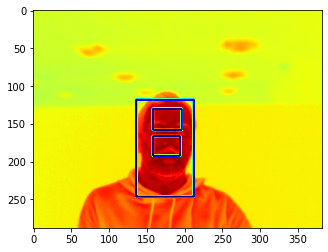

In [11]:
plt.imshow(img, cmap='jet')
plt.savefig('face_boundry.png', dpi=300, bbox_inches='tight')
